# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df .head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head()

C:\Python\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


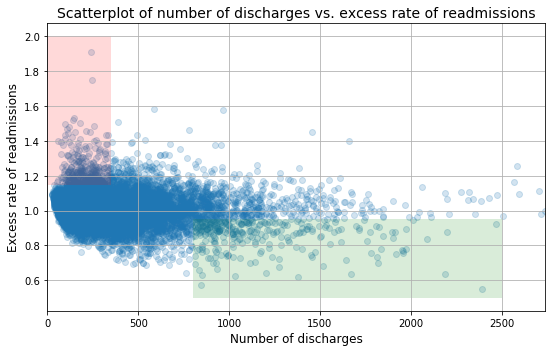

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# read in readmissions data provided
df = clean_hospital_read_df
df.shape

(11578, 12)

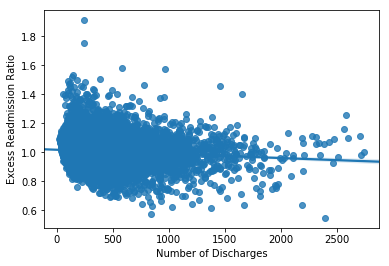

In [6]:
sns.regplot( x="Number of Discharges",y='Excess Readmission Ratio', data=df[df['Number of Discharges']<3000])
plt.show()

In [7]:
df1=df[["Number of Discharges",'Excess Readmission Ratio']]
df1.corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


The correlation between a number of discharges and the excess readmission ratio is negative and very small. So It looks like that the conclusion above about strong correlation is wrong.


In [8]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)
df=pd.concat([x,y],axis=1)
df.columns=["Discharges",'Excess_readmission']
df.head()

,Discharges,Excess_readmission
0,25,1.0914
1,27,1.0961
2,28,1.0934
3,29,1.0908
4,30,1.1123


C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


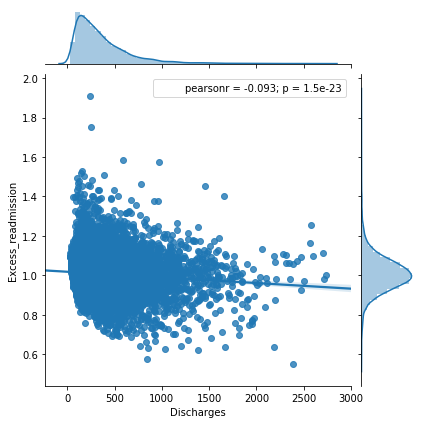

In [9]:
sns.jointplot('Discharges', 'Excess_readmission', data=df, kind='reg')
plt.show()

In [10]:
df['Discharges'].describe()

count    11494.000000
mean       364.313729
std        299.546395
min         25.000000
25%        159.250000
50%        281.000000
75%        474.000000
max       2740.000000
Name: Discharges, dtype: float64

In [11]:
df['Discharges'].median()

281.0

In [12]:
df['Excess_readmission'].describe()

count    11494.000000
mean         1.007541
std          0.091912
min          0.549500
25%          0.952700
50%          1.003550
75%          1.058075
max          1.909500
Name: Excess_readmission, dtype: float64

In [13]:
print('Total count of large hospitals: ',sum(df['Discharges']>1000))
print('Total count of Medium hospitals: ',sum((df['Discharges']<=1000)&(df['Discharges']>=100)))
print('Total count of small hospitals: ',sum(df['Discharges']<100))

Total count of large hospitals:  460
Total count of Medium hospitals:  9846
Total count of small hospitals:  1188


The total count of large hospitals (In a way which is reported in a preliminary report) is much smaller than the small or medium size hospitals in this dataset.

# A. Do you agree with the above analysis and recommendations? Why or why not?

In [14]:
small= df[df['Discharges'] < 100]
small_mean= small['Excess_readmission'].mean()
small_prop = (sum(small['Excess_readmission'] > 1)/len(small)) * 100

large = df[df['Discharges'] > 1000]
large_mean= large['Excess_readmission'].mean()
large_prop = (sum(large['Excess_readmission'] > 1)/len(large)) * 100

print('Small Hospitals: Mean: %6.3F, Excess_readmission>1: %6.3F'% (small_mean,small_prop))
print('Large Hospitals: Mean: %6.3F, Excess_readmission>1: %6.3F'% (large_mean,large_prop))

Small Hospitals: Mean:  1.023, Excess_readmission>1: 63.215
Large Hospitals: Mean:  0.979, Excess_readmission>1: 44.565


The statistics preliminary report above is correct. However, I don't agree with the rest of it, because:
- The conclusion is just base on one graph
- It is important to check the statical significance and the correlation between variables. The correlation between the excess readmission ratio and hospital size is extremely small (r=-0.097398). It is not logical to come to the conclusion that the rate of readmissions is trending down with increasing number of discharges.
- No hypothesis test has been provided
- The hospital capacity is just grouped into two. (What happened to the medium size hospitals?) 
- It can be clearly seen from the scatterplot that there are a considerable amount of data points which have low hospital capacity and low readmission ratio. The same logic applies to large hospitals as well. There are a considerable amount of data points that suggest the existence of large hospitals with readmission ratio greater than 1.

**Conclusion: Above analysis and recommendations are misleading and false.**




# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

**Setup an appropriate hypothesis test.**
- Assume, significance level $\alpha$ = 0.01

* ** H0: Null Hypothesis:** The true mean excess readmission ratio for small and large hospitals are the same
* ** Ha: Alternate Hypothesis:** The true mean excess readmission ratio for small and large hospitals are not the same


**Compute and report the observed significance value (or p-value).**

In [15]:
df['Discharges'].median()

281.0

In [16]:
#For getting better result
Small_df=df[df['Discharges']<=281]
Small_mean=Small_df['Excess_readmission'].mean()
Small_std=Small_df['Excess_readmission'].std()
Small_df.describe()


,Discharges,Excess_readmission
count,5748.000000,5748.000000
mean,161.931628,1.014505
std,64.883784,0.082062
min,25.000000,0.760200
25%,108.000000,0.961700
50%,159.500000,1.006850
75%,216.000000,1.056025
max,281.000000,1.909500


C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


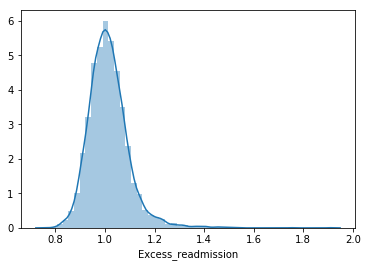

In [17]:
sns.distplot(Small_df['Excess_readmission'])
plt.show()

In [18]:
Large_df=df[df['Discharges']>281]
Large_mean=Large_df['Excess_readmission'].mean()
Large_std=Large_df['Excess_readmission'].std()
Large_df.describe()

,Discharges,Excess_readmission
count,5746.000000,5746.000000
mean,566.766272,1.000574
std,305.479133,0.100331
min,282.000000,0.549500
25%,361.000000,0.939425
50%,474.000000,0.999000
75%,659.000000,1.061175
max,2740.000000,1.583600


Now we have almost equal value counts of the large and small hospitals.

C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


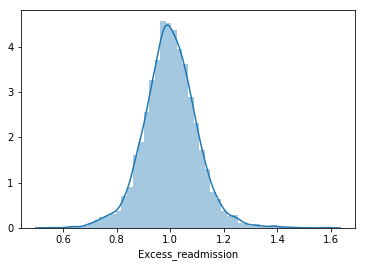

In [19]:
sns.distplot(Large_df['Excess_readmission'])
plt.show()

We have normal distribution and CLT applies, we can use z-test to find p_value.

In [20]:
H0_mean_diff = 0
mean_diff = Large_mean - Small_mean
sigma_diff = np.sqrt((Large_std**2)/len(Large_df)  + (Small_std**2)/len(Small_df))
z = (mean_diff -H0_mean_diff) / sigma_diff
p_value = stats.norm.cdf(z) * 2

print('Z is %6.3F, p_value is %6.20F' % (z,p_value))

Z is -8.148, p_value is 0.00000000000000037107


I also use the Bootstraping technique to find the p-value.

In [21]:
#Necessary fucntions for bootstraping
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data =np.concatenate((data1,data2))
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates =np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] =func(perm_sample_1,perm_sample_2)

    return perm_replicates


def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

In [22]:
Small=Small_df['Excess_readmission']
Large=Large_df['Excess_readmission']


size = 100000
bs_replicates_S = np.empty(size)
bs_replicates_L= np.empty(size)

for i in range(size):
    bs_S = np.random.choice(Small,len(Small))
    bs_L = np.random.choice(Large,len(Large))
    bs_replicates_S[i] = np.mean(bs_S)
    bs_replicates_L[i] = np.mean(bs_L)
    
S_conf_interval = np.percentile(bs_replicates_S,[2.5,97.5])
L_conf_interval = np.percentile(bs_replicates_L,[2.5,97.5])

S_margin_error = z*(np.std(Small)/(np.sqrt(len(Small))))
L_margin_error = z*(np.std(Large)/(np.sqrt(len(Large))))


                                   
perm_reps = draw_perm_reps(Small,Large, diff_of_means, 10000)
diff=Small.mean()-Large.mean()
p = np.sum(perm_reps >= diff)/10000
print('The Small hospital confidence interval is ', S_conf_interval)
print('The Small hospital margin of error is ', S_margin_error)
print('The Large hospital confidence interval is ', L_conf_interval)
print('The Large hospital margin of error is ', L_margin_error)
print('The P statistic is', p)


The Small hospital confidence interval is  [1.01238929 1.01661445]
The Small hospital margin of error is  -0.008818143455450985
The Large hospital confidence interval is  [0.99796662 1.00317957]
The Large hospital margin of error is  -0.010783191598288213
The P statistic is 0.0


p_value is almost equal to zero in z test and it is equal to zero in bootstraping technique, So I reject the null-hypothesis and accept the alternative hypothesis.
I conclude with reasonable confidence that the true mean excess readmission ratio of large and small hospitals are not the same and there is a statistically significant difference between them.

**Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


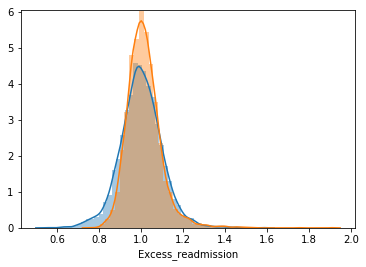

In [23]:
sns.distplot(Large_df['Excess_readmission'])
sns.distplot(Small_df['Excess_readmission'])
plt.show()

As it is shown in the graph, Although the result is statistically significant, it could be not practically significant. As can be seen above, the ranges within 99% of the samples fall are pretty close to each other.
I think other features with higher correlated to the excess admission ratio has to be checked to get the final conclusion.


**Look at the scatterplot above. 
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.**


An important advantage scatterplot is that it allows us to visualize the correlation between two variables. It can be clearly seen that there is a very weak (almost non-existent) negative correlation between hospital capacity and excess admission ratio.

However, scatterplots have their disadvantages. In this case, there was a large amount of overplotting which led to the preliminary reported of incorrect and misleading conclusions.

I use factorplot to create bar plots for both small and large hospitals. 

In [24]:
Small0=sum(Small_df['Excess_readmission']<=1)
Small1=sum(Small_df['Excess_readmission']>1)
Small=Small0+Small1
Large0=sum(Large_df['Excess_readmission']<=1)
Large1=sum(Large_df['Excess_readmission']>1)
Large=Large0+Large1

dfNew=pd.DataFrame([Small0/Small,Small1/Small,Large0/Large,Large1/Large])
dfNew.columns=['value']
dfNew['ratio']=['<=1','>1','<=1','>1']
dfNew['size']=['small','small','large','large']

dfNew

,value,ratio,size
0,0.461726,<=1,small
1,0.538274,>1,small
2,0.505047,<=1,large
3,0.494953,>1,large


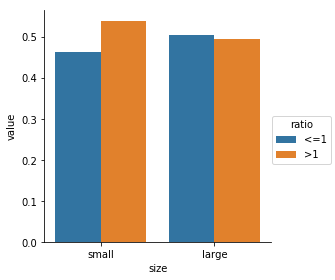

In [25]:
sns.factorplot(x='size', y='value', hue='ratio', data=dfNew, kind='bar')
plt.show()

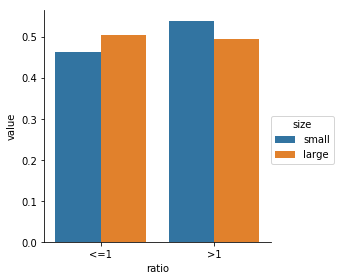

In [26]:
sns.factorplot(x='ratio', y='value', hue='size', data=dfNew, kind='bar')
plt.show()